## Notebook del capítulo 5
### Ejemplo 5.2

In [1]:
# 5/6/24
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Datos de resistencias y de temperaturas
yn = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
               1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
               2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
               2053.50, 2414.40, 2200.50, 2654.20, 1753.70,2665.86])
xn = np.array([150.50, 230.75, 80.00, 170.00, 50.50, 190.00, 240.00, 20.50,
               70.50, 110.00, 130.00, 30.75, 250.00, 90.75, 220.00, 180.00,
               60.00, 120.50, 20.00, 210.50,0.00])
n=len(xn)
k=2

In [3]:
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7234 ± 0.2695
b = 2622.2834 ± 39.7582


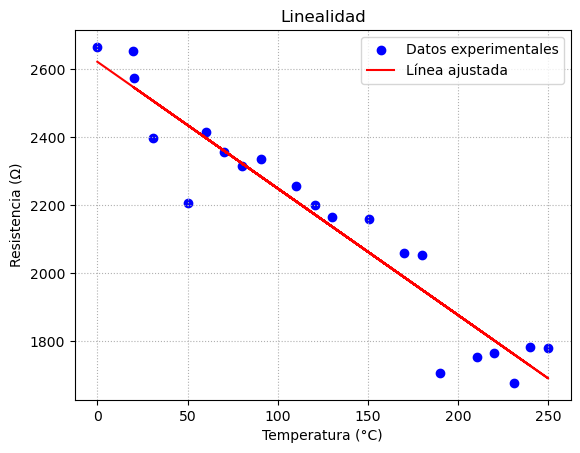

In [4]:
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title('Linealidad')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia (Ω)')
plt.legend()
plt.show()

In [5]:
y_pred = m * xn + b
y_pred

array([2061.90678577, 1763.10128967, 2324.40881038, 1989.29984279,
       2434.25008309, 1914.83118333, 1728.65953467, 2545.95307228,
       2359.78142362, 2212.70582118, 2138.23716172, 2507.78788431,
       1691.42520494, 2284.38190591, 1803.12819413, 1952.06551306,
       2398.87746984, 2173.60977496, 2547.81478877, 1838.50080738,
       2622.28344823])

In [6]:
e_i=yn-y_pred
e_i

array([  96.79321423,  -84.95128967,   -8.40881038,   72.00015721,
       -226.75008309, -206.53118333,   56.04046533,   29.04692772,
         -1.88142362,   43.99417882,   26.96283828, -108.23788431,
         88.37479506,   52.36809409,  -37.82819413,  101.43448694,
         15.52253016,   26.89022504,  106.38521123,  -84.80080738,
         43.57655177])

In [7]:
Sum_y = np.sum(yn)
Sum_y 

45293.009999999995

In [8]:
Sum_yp = np.sum(y_pred)
Sum_yp

45293.01

In [9]:
np.sum(e_i)

-4.547473508864641e-13

In [10]:
# Los promedios de x y y 
xp= np.sum(xn)/n
yp= np.sum(yn)/n
print(xp,',', yp,',', m * xp + b)

125.01190476190476 , 2156.81 , 2156.81


In [11]:
np.sum(xn*e_i)

-3.310560714453459e-10

In [12]:
np.sum(y_pred*e_i)

1.6007106751203537e-10

In [13]:
Sx2 = np.sum((xn-xp)**2)/n
Sy2 = np.sum((yn-yp)**2)/n
Sxy=np.sum((xn-xp)*(yn-yp))/n
m=Sxy/Sx2 
b=yp-m*xp
Sx2 , Sy2, Sxy, m, b

(6140.984977324264,
 93610.76661904762,
 -22865.545952380955,
 -3.723432973181426,
 2622.283448230692)

In [14]:
r=Sxy/(np.sqrt(Sx2)*np.sqrt(Sy2))
r, r**2

(-0.9536733725716964, 0.9094929015522736)

In [15]:
myx=r*np.sqrt(Sy2)/np.sqrt(Sx2)
mxy=r*np.sqrt(Sx2)/np.sqrt(Sy2)
myx,mxy

(-3.7234329731814246, -0.24426192390276133)

In [16]:
SSR= np.sum((yn-y_pred)**2)
SSE= np.sum((y_pred-yp)**2)
SST= np.sum((yn-yp)**2)
SSR,SSE,SST, SSR+SSE

(177921.21627330303, 1787904.8827266952, 1965826.099, 1965826.098999998)

In [17]:
R2=SSE/SST
R2

0.9094929015522727

In [18]:
l=1
R2_ajus= 1- ((1-R2)*(n-1))/(n-l-1)
R2_ajus

0.9047293700550239

In [19]:
sig2=SSR/(n-2)
Db=np.sqrt(sig2*(1/n+xp**2/(np.sum((xn-xp)**2))))
Dm=np.sqrt(sig2/(np.sum((xn-xp)**2)) )
sig2, Dm, Db

(9364.274540700158, 0.26946874768576357, 39.75824977683072)

In [20]:
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7234 ± 0.2695
b = 2622.2834 ± 39.7582


In [21]:
tm=m/Dm
tb=b/Db
tm, tb

(-13.817680176862085, 65.95570637414825)

In [22]:
m-2.093*Dm, m+2.093*Dm

(-4.287431062087729, -3.159434884275123)

In [23]:
b-2.093*Db, b+2.093*Db

(2539.0694314477855, 2705.4974650135987)

In [24]:
SSR,SSE, n, k

(177921.21627330303, 1787904.8827266952, 21, 2)

In [66]:
# Calcular MSR y MSE
#MSR = SSR/(k-1)
#MSE = SSE/(n-k)
# Calcular el estadístico F
F_manual = (SSR/(k-1))/(SSE/(n-k))
F_manual

190.92828547004726

In [67]:
np.sum(xn*e_i)

-3.310560714453459e-10

In [28]:
np.sum(y_pred*e_i)

1.6007106751203537e-10

In [29]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.31e-11
Time:                        14:18:30   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

In [30]:
SS_T=np.sum(yn**2)-len(xn)*yp**2
SS_T

1965826.098999992

In [31]:
SS_R= SS_T - m*np.sum(yn*(xn-xp))
SS_R

177921.21627329546

In [32]:
s=SS_R/(len(xn)-2)
s

9364.274540699762

In [33]:
np.sqrt(np.sum(e_i**2)/(len(xn)-2))

96.76918177136851

In [34]:
np.sqrt(s*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))

39.75824977682988

In [35]:
np.sqrt(s/(np.sum((xn-xp)**2)) )

0.26946874768575785

In [36]:
xp**2

15627.976332199545

In [37]:
np.sum((xn-xp)**2)

128960.68452380954

In [38]:
from scipy import stats
# Sumas necesarias
n = len(xn)
sum_x = np.sum(xn)
sum_y = np.sum(yn)
sum_x2 = np.sum(xn**2)
sum_xy = np.sum(xn * yn)

# Calcular m y b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Predicciones
y_hat = m * xn + b

# Calcular SS_res y SS_tot
SS_res = np.sum((yn - y_hat)**2)
SS_tot = np.sum((yn - np.mean(yn))**2)

# Calcular R^2
R2 = 1 - (SS_res / SS_tot)

# Error estándar de los residuos
s = np.sqrt(SS_res / (n - 2))

# Varianza de los parámetros
sigma_m2 = np.sqrt(s**2 / np.sum((xn - np.mean(xn))**2))
sigma_b2 = np.sqrt(s**2 * (1/n + np.mean(xn)**2 / np.sum((xn - np.mean(xn))**2)))

# Estadísticos t
t_m = m / np.sqrt(sigma_m2)
t_b = b / np.sqrt(sigma_b2)

# Valores p
p_m = 2 * (1 - stats.t.cdf(np.abs(t_m), df=n-2))
p_b = 2 * (1 - stats.t.cdf(np.abs(t_b), df=n-2))

# Resultados
print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Coeficiente de determinación (R^2): {R2}")
print(f"Error estándar de los residuos: {s}")
print(f"Varianza de m: {sigma_m2}")
print(f"Varianza de b: {sigma_b2}")
print(f"t-m: {t_m}, p-m: {p_m}")
print(f"t-b: {t_b}, p-b: {p_b}")

Pendiente (m): -3.7234329731814206
Intercepto (b): 2622.2834482306916
Coeficiente de determinación (R^2): 0.9094929015522735
Error estándar de los residuos: 96.76918177136854
Varianza de m: 0.2694687476857636
Varianza de b: 39.75824977683073
t-m: -7.172810187325711, p-m: 8.148548074071726e-07
t-b: 415.87805561401336, p-b: 0.0


###  Ley de Enfriamiento

Pendiente: -3.7234329731814264
Intersección: 2622.2834482306926
Coeficiente de determinación R^2: 0.9094929015522738
Valor p: 2.3115343196844267e-11
Error estándar: 0.2694687476857632


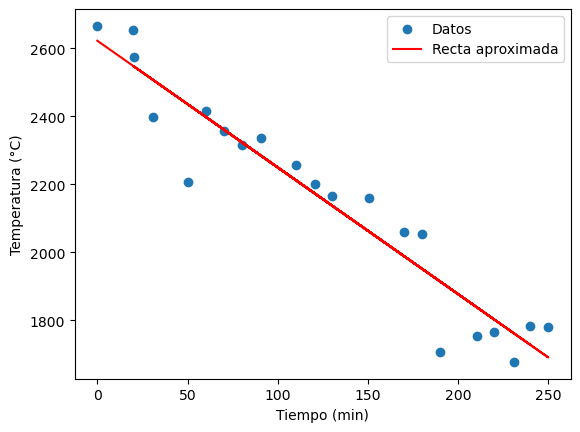

In [39]:
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Recta aproximada')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
#plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Pendiente: -3.7234329731814264
Intersección: 2622.2834482306926
Coeficiente de determinación R^2: 0.9094929015522738
Valor p: 2.3115343196844267e-11
Error estándar: 0.2694687476857632


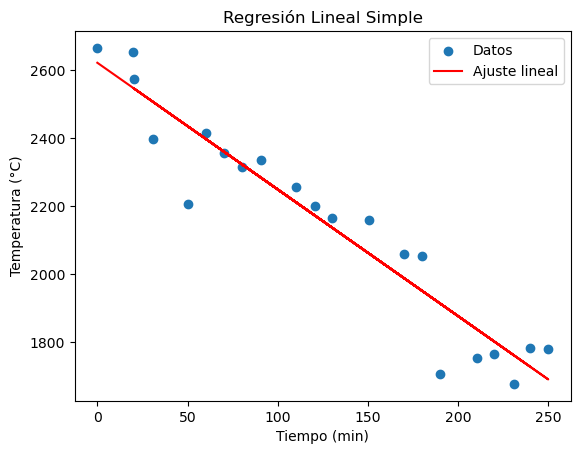

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Ajuste lineal')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Temperatura ambiente (T_env): -331656.50522553275
Temperatura inicial (T_0): 2622.491587129016
Constante (k): 1.1154325009984942e-05


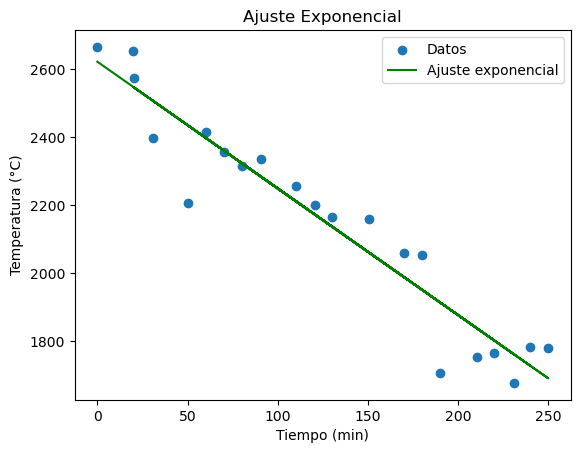

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
try:
    params, covariance = curve_fit(
        exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
    )
    T_env, T_0, k = params

    # Mostrar resultados
    print(f'Temperatura ambiente (T_env): {T_env}')
    print(f'Temperatura inicial (T_0): {T_0}')
    print(f'Constante (k): {k}')

    # Graficar resultados
    plt.scatter(xn, yn, label='Datos')
    plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Ajuste Exponencial')
    plt.legend()
    plt.show()
except RuntimeError as e:
    print(f"No se pudieron encontrar los parámetros óptimos: {e}")




Temperatura ambiente (T_env): -331656.50522553275
Temperatura inicial (T_0): 2622.491587129016
Constante (k): 1.1154325009984942e-05


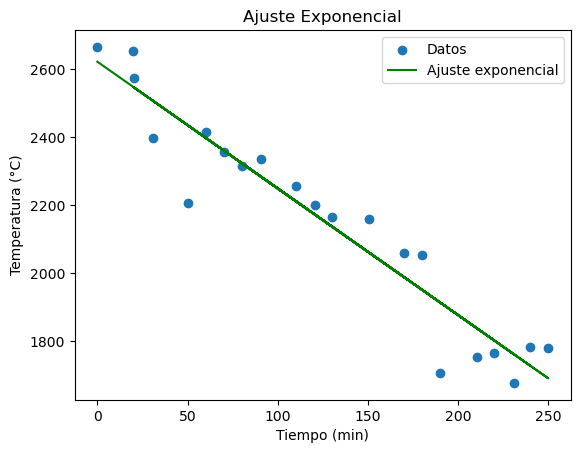

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos inventados

# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
params, covariance = curve_fit(
    exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
)
T_env, T_0, k = params

# Mostrar resultados
print(f'Temperatura ambiente (T_env): {T_env}')
print(f'Temperatura inicial (T_0): {T_0}')
print(f'Constante (k): {k}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial')
plt.legend()
plt.show()


In [43]:
import numpy as np
from scipy.stats import linregress

# Datos

# Ajuste del modelo de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Predicciones del modelo
yn_pred = intercept + slope * xn

# Cálculo de las sumas de cuadrados
y_mean = np.mean(yn)
SSR = np.sum((yn_pred - y_mean)**2)
SSE = np.sum((yn - yn_pred)**2)

# Número de coeficientes (k = 2: intercepto y pendiente)
k = 2

# Número total de observaciones
n = len(yn)

# Cálculo del estadístico F
MSR = SSR / k
MSE = SSE / (n - k - 1)
F_statistic = MSR / MSE

# Mostrar los resultados
print(f"Estadístico F: {F_statistic:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F: 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [44]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Obtener el valor del estadístico F del resumen
F_statistic = model.fvalue

# Número de coeficientes (k = 2: intercepto y pendiente)
k = 2

# Número total de observaciones
n = len(yn)

# Calcular las sumas de cuadrados
SSR = np.sum((model.predict() - np.mean(yn))**2)
SSE = np.sum((yn - model.predict())**2)

# Calcular MSR y MSE
MSR = SSR / k
MSE = SSE / (n - k - 1)

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (del resumen): {F_statistic:.4f}")
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F (del resumen): 190.9283
Estadístico F (manual): 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [45]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Obtener los parámetros del modelo
beta0, beta1 = model.params

# Número de observaciones (n) y número de coeficientes (k)
n = len(yn)
k = X.shape[1]

# Calcular las sumas de cuadrados (SSR y SSE)
SSR = np.sum((model.predict() - np.mean(yn))**2)
SSE = np.sum((yn - model.predict())**2)

# Calcular MSR y MSE
MSR = SSR / k
MSE = SSE / (n - k - 1)

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F (manual): 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [46]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Predicciones del modelo
y_pred = model.predict(X)

# Calcular SSR y SSE
y_mean = np.mean(yn)
SSR = np.sum((y_pred - y_mean) ** 2)
SSE = np.sum((yn - y_pred) ** 2)

# Grados de libertad
n = len(yn)
k = X.shape[1]
df_reg = k - 1
df_res = n - k

# Calcular MSR y MSE
MSR = SSR / df_reg
MSE = SSE / df_res

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")
print(f"Grados de libertad para la regresión (df_reg): {df_reg}")
print(f"Grados de libertad para el residuo (df_res): {df_res}")


Estadístico F (manual): 190.9283
SSR: 1787904.88
SSE: 177921.22
MSR: 1787904.88
MSE: 9364.27
Número de observaciones (n): 21
Número de coeficientes (k): 2
Grados de libertad para la regresión (df_reg): 1
Grados de libertad para el residuo (df_res): 19


In [47]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

# Datos


# Ajustar el modelo de regresión
X = sm.add_constant(xn)
model = sm.OLS(yn, X).fit()

# Obtener los coeficientes
intercept, slope = model.params

# Obtener los errores estándar
stderr_intercept, stderr_slope = model.bse

# Nivel de confianza (95%)
confidence_level = 0.95
alpha = 1 - confidence_level
n = len(yn)  # número de observaciones
p = 2  # número de parámetros (intersección y pendiente)
dof = n - p  # grados de libertad

# Obtener el valor crítico de t
t_critical = t.ppf(1 - alpha/2, dof)

# Calcular el intervalo de confianza
ci_intercept = (intercept - t_critical * stderr_intercept, intercept + t_critical * stderr_intercept)
ci_slope = (slope - t_critical * stderr_slope, slope + t_critical * stderr_slope)

ci_intercept, ci_slope


((2539.0684750866135, 2705.4984213747707),
 (-4.2874375439989985, -3.15942840236385))

In [48]:
import numpy as np
import statsmodels.api as sm

# Datos


# Ajustar el modelo de regresión
X = sm.add_constant(xn)
model = sm.OLS(yn, X).fit()

# Obtener los coeficientes
intercept, slope = model.params

# Obtener los errores estándar
stderr_intercept, stderr_slope = model.bse

# Mostrar resultados
intercept, slope, stderr_intercept, stderr_slope

# Valor crítico de t
t_critical = 2.093

# Calcular el intervalo de confianza para la intersección
ci_intercept_manual = (intercept - t_critical * stderr_intercept, intercept + t_critical * stderr_intercept)

# Calcular el intervalo de confianza para la pendiente
ci_slope_manual = (slope - t_critical * stderr_slope, slope + t_critical * stderr_slope)

ci_intercept_manual, ci_slope_manual

print(f"Intervalo de confianza para el intercepto: {ci_intercept_manual}")
print(f"Intervalo de confianza para la pendiente: {ci_slope_manual}")



Intervalo de confianza para el intercepto: (2539.0694314477855, 2705.4974650135987)
Intervalo de confianza para la pendiente: (-4.287431062087728, -3.1594348842751208)


In [49]:
import scipy.stats as stats

# Valores
F_statistic = 190.9
df_modelo = 1
df_error = 19

# Calcular el p-valor
p_value = 1 - stats.f.cdf(F_statistic, df_modelo, df_error)
p_value


2.3145041438965563e-11

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.31e-11
Time:                        14:18:31   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

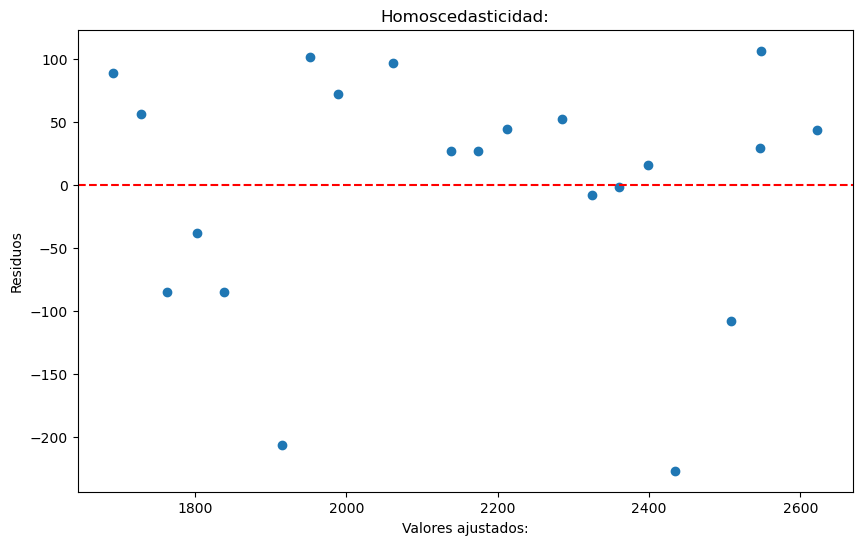

/Users/hector/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


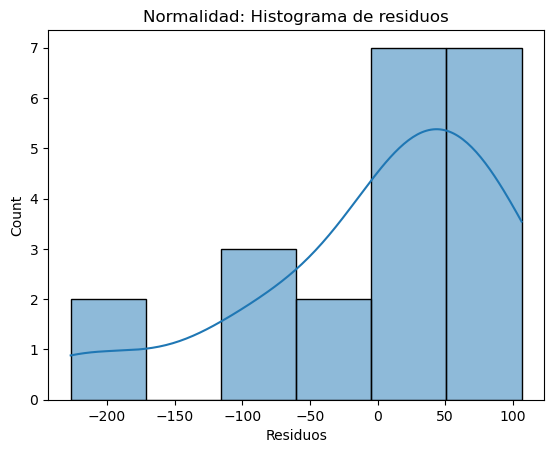

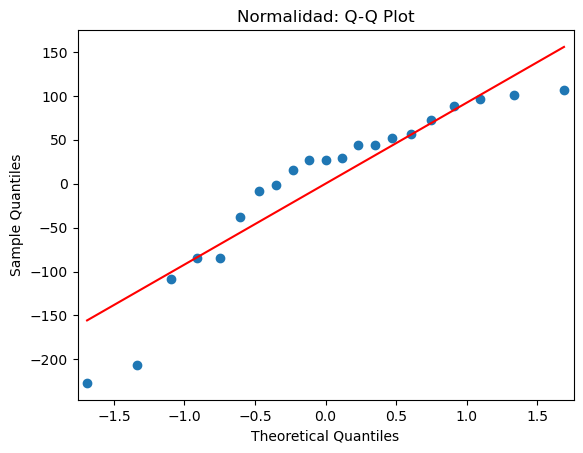

Estadístico de Durbin-Watson: 2.03


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns

# Datos de ejemplo


# Agregar constante para el intercepto
X = sm.add_constant(xn)

# Ajustar modelo
model = sm.OLS(yn, X).fit()

# Resumen del modelo
print(model.summary())

# Gráficos de Diagnóstico

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados:')
plt.ylabel('Residuos')
plt.title('Homoscedasticidad:')
plt.show()

# Histograma de residuos
#plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel('Residuos')
plt.title('Normalidad: Histograma de residuos')
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Normalidad: Q-Q Plot')
plt.show()

# Prueba de Durbin-Watson
dw_stat = durbin_watson(model.resid)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')


In [51]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Agregar constante para el intercepto
X = sm.add_constant(xn)

# Ajustar el modelo
model = sm.OLS(yn, X).fit()

# Calcular el estadístico de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')


Estadístico de Durbin-Watson: 2.03


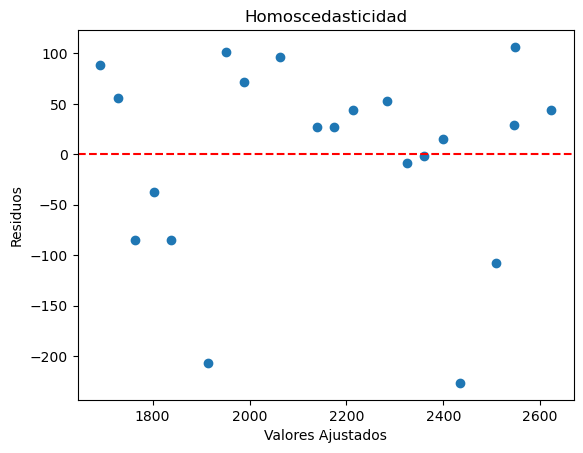

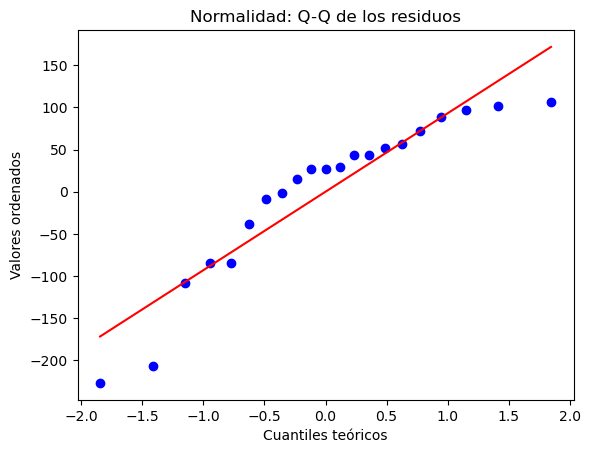

Estadístico de Shapiro-Wilk: 0.875, p-valor: 0.012


In [52]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Graficar residuos vs. valores ajustados
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homoscedasticidad')
plt.show()

# Graficar Q-Q plot para verificar normalidad
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
#sm.qqplot(residuals, line='45')
plt.title('Normalidad: Q-Q de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Valores ordenados')
plt.show()

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {shapiro_test[0]:.3f}, p-valor: {shapiro_test[1]:.3f}')


In [53]:
import numpy as np

def durbin_watson(residuals):
    diff_resid = np.diff(residuals)
    dw_stat = np.sum(diff_resid**2) / np.sum(residuals**2)
    return dw_stat

# Ejemplo de uso
# Supongamos que tienes un modelo de regresión y sus residuos se almacenan en la variable 'residuals'

residuals = model.resid # Este es un ejemplo de residuos
dw_statistic = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_statistic:.3f}')


Estadístico de Durbin-Watson: 2.027


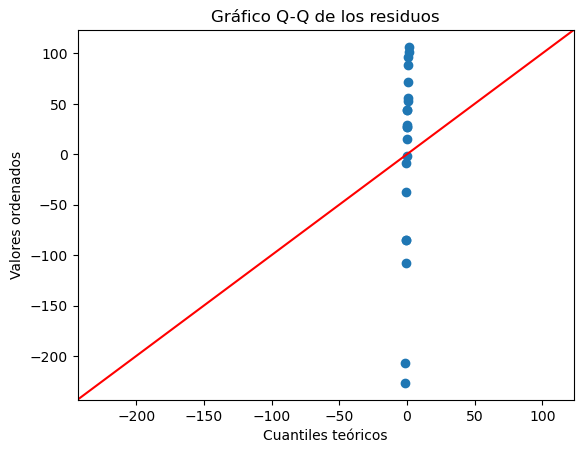

In [54]:
X = sm.add_constant(xn)

# Ajustar el modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Calcular los residuos
residuals = model.resid

# Crear el gráfico Q-Q
sm.qqplot(residuals, line='45')
plt.title('Gráfico Q-Q de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Valores ordenados')
plt.show()


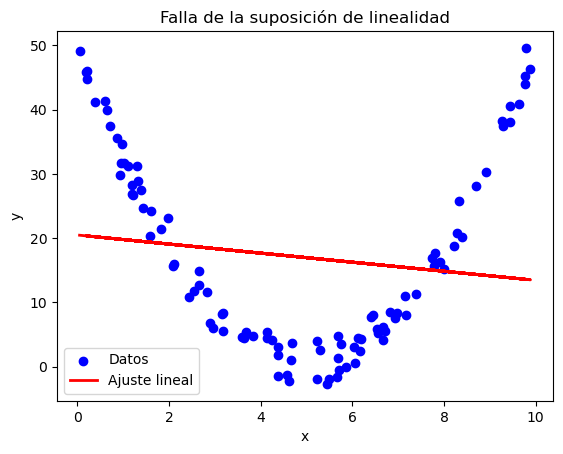

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos no lineales (relación cuadrática)
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 * (x - 5)**2 + np.random.randn(100, 1) * 2

# Ajustar un modelo de regresión lineal a estos datos no lineales
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', linewidth=2, label='Ajuste lineal')
plt.title('Falla de la suposición de linealidad')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


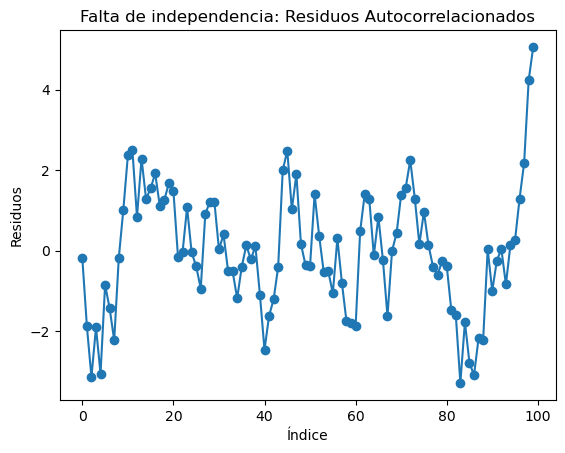

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir autocorrelación en los errores
rho = 0.8
errors = np.random.normal(scale=1, size=100)
for i in range(1, len(errors)):
    errors[i] += rho * errors[i-1]

y_autocorrelated = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_autocorrelated, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_autocorrelated - y_pred

# Gráfica de los residuos autocorrelacionados
#plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.title('Falta de independencia: Residuos Autocorrelacionados')
plt.show()


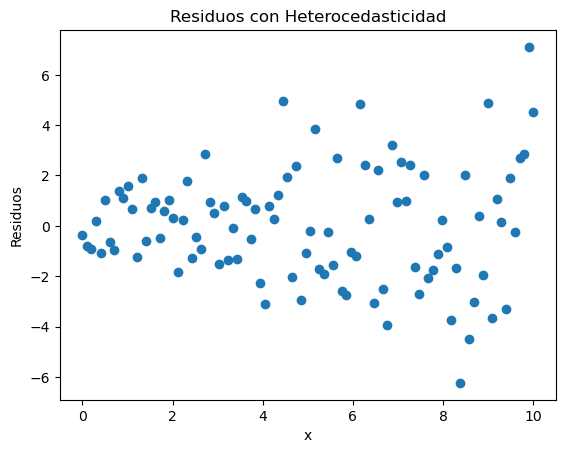

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir heterocedasticidad en los errores
errors = np.random.normal(scale=1, size=100) * np.sqrt(x)

y_heteroscedastic = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_heteroscedastic, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_heteroscedastic - y_pred

# Gráfica de los residuos con heterocedasticidad
#plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, marker='o')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos con Heterocedasticidad')
plt.show()


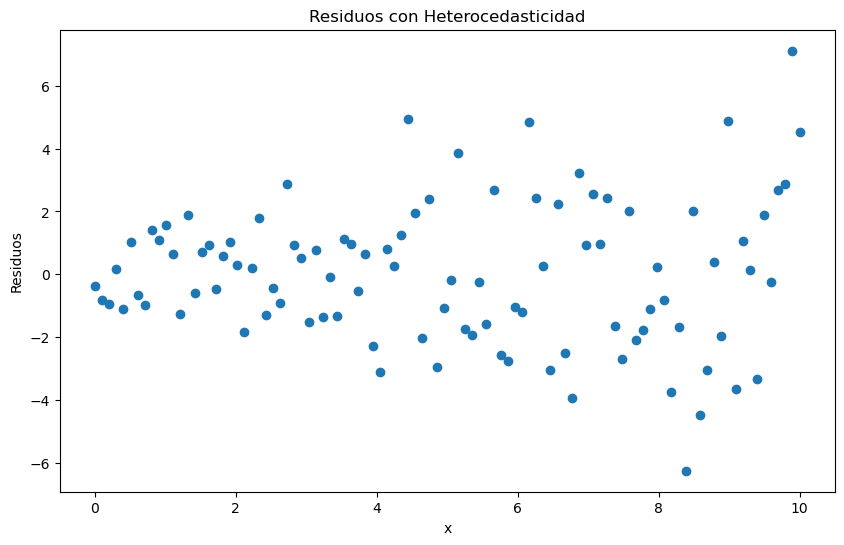

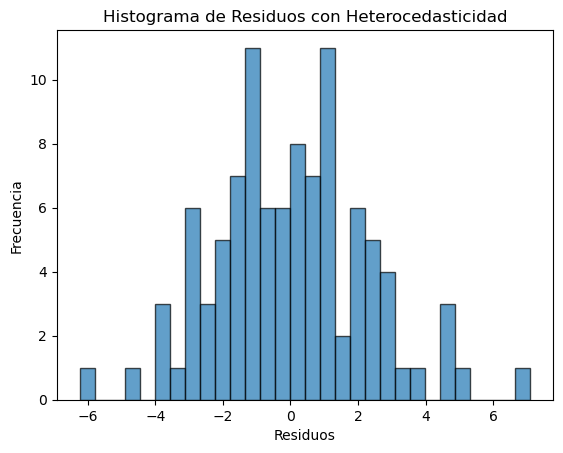

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir heterocedasticidad en los errores
errors = np.random.normal(scale=1, size=100) * np.sqrt(x)

y_heteroscedastic = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_heteroscedastic, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_heteroscedastic - y_pred

# Gráfica de los residuos con heterocedasticidad
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, marker='o')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos con Heterocedasticidad')
plt.show()

# Histograma de los residuos
#plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos con Heterocedasticidad')
plt.show()


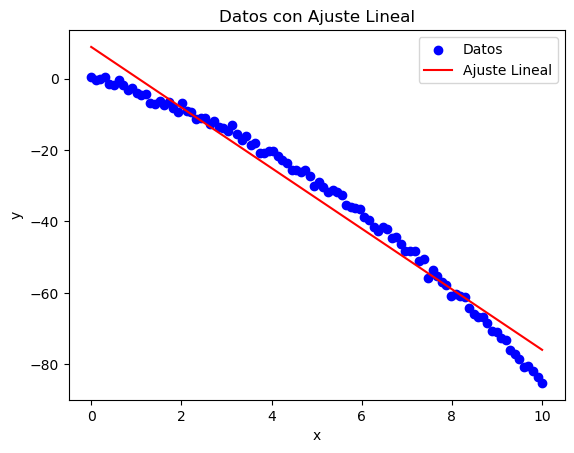

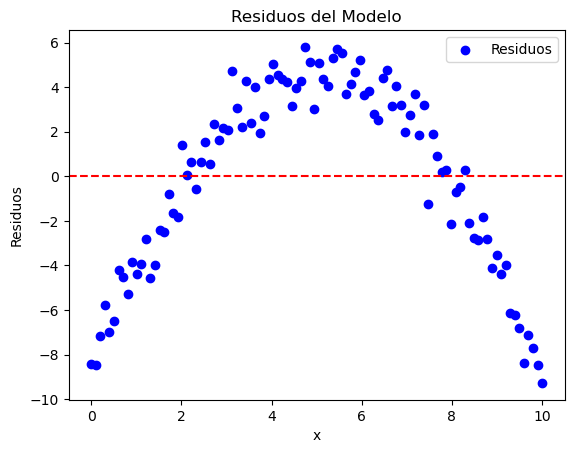

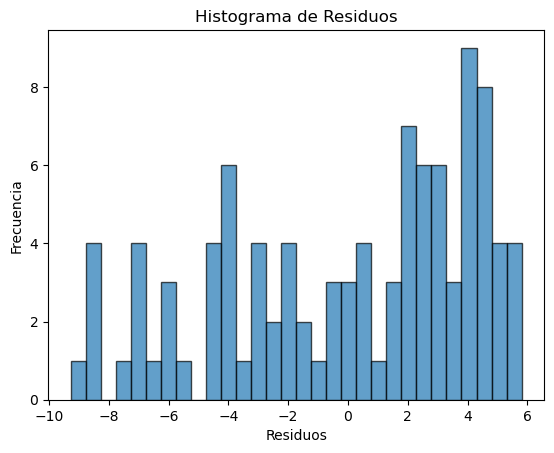

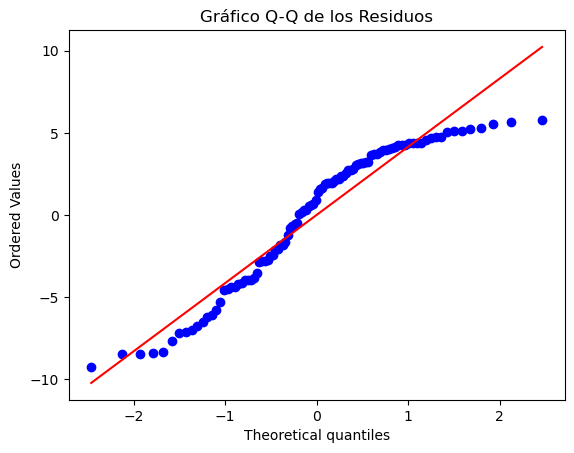

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3364.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.13e-77
Time:                        14:18:32   Log-Likelihood:                -285.95
No. Observations:                 100   AIC:                             575.9
Df Residuals:                      98   BIC:                             581.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9013      0.847     10.511      0.0

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot

# Generar datos
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = -3 * x - 0.55 * (x ** 2) + np.random.normal(scale=1, size=100)

# Ajuste de regresión lineal
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
residuals = y - y_pred

# Gráfica de los datos y la línea de regresión
#plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_pred, label='Ajuste Lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos con Ajuste Lineal')
plt.legend()
plt.show()

# Gráfica de residuos
#plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, label='Residuos', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo')
plt.legend()
plt.show()

# Histograma de residuos
#plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# Gráfico Q-Q
#plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

# Resultados del modelo
print(model.summary())


In [60]:
import scipy.stats as stats

# Grados de libertad
df = 19
# Nivel de confianza del 95%
alpha = 0.05

# Valor crítico t
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical


2.093024054408263

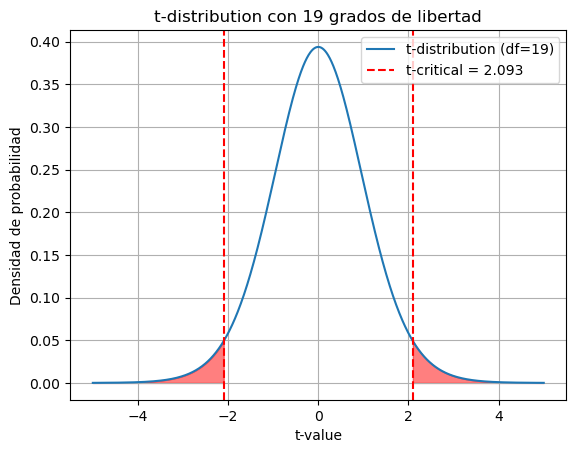

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the parameters for the t-distribution
df = 19
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

# Generate x values for the plot
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df)

# Create the plot
#plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-distribution (df={df})')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='red', alpha=0.5)
plt.fill_between(x, 0, y, where=(x <= -t_critical), color='red', alpha=0.5)
plt.axvline(t_critical, color='red', linestyle='--', label=f't-critical = {t_critical:.3f}')
plt.axvline(-t_critical, color='red', linestyle='--')

plt.title('t-distribution con 19 grados de libertad')
plt.xlabel('t-value')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


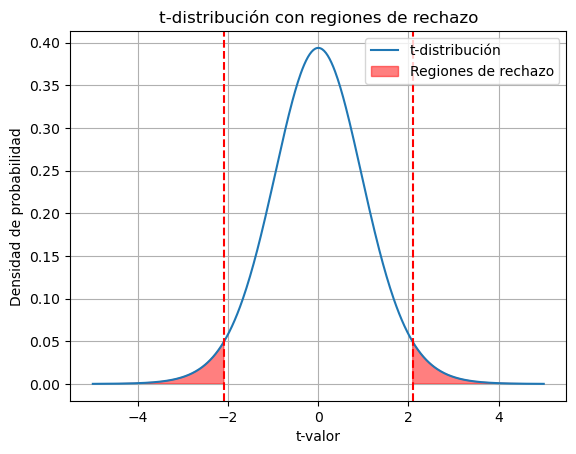

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Grados de libertad y nivel de significancia
dof = 19
alpha = 0.05

# Valores críticos
t_critical = stats.t.ppf(1 - alpha/2, dof)

# Distribución t de Student
x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, dof)
plt.legend(loc='best')
# Graficar la distribución t
plt.plot(x, y, label=f't-distribución')

# Sombrar las regiones de rechazo
plt.fill_between(x, y, where=(x > t_critical) | (x < -t_critical), color='red', alpha=0.5, label='Regiones de rechazo')

# Líneas de valores críticos
plt.axvline(x=-t_critical, color='red', linestyle='--')
plt.axvline(x=t_critical, color='red', linestyle='--')

# Leyenda y etiquetas
plt.legend()
plt.xlabel('t-valor')
plt.ylabel('Densidad de probabilidad')
plt.title('t-distribución con regiones de rechazo')
plt.grid(True)
plt.show()


In [63]:
import scipy.stats as stats

# Valor t calculado
t_calculado = -13.8177
dof = 19

# Calcular el p-valor
p_valor = 2 * (1 - stats.t.cdf(abs(t_calculado), df=dof))

p_valor


2.311484337269576e-11

In [64]:
# Predicciones del modelo
y_pred = model.predict(X)

# Calcular SSR (Sum of Squared Residuals)
SSR = np.sum((yn - y_pred) ** 2)

# Calcular SST (Total Sum of Squares)
SST = np.sum((yn - np.mean(yn)) ** 2)

# Calcular R^2
R2 = 1 - (SSR / SST)
print(f'R^2: {R2}')

ValueError: operands could not be broadcast together with shapes (21,) (100,) 

In [ ]:
# Número de observaciones y predictores
n = len(yn)
k = 1  # número de predictores (excluyendo el intercepto)

# Calcular R^2 ajustado
R2_ajustado = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f'R^2 ajustado: {R2_ajustado}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.31e-11
Time:                        14:40:40   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

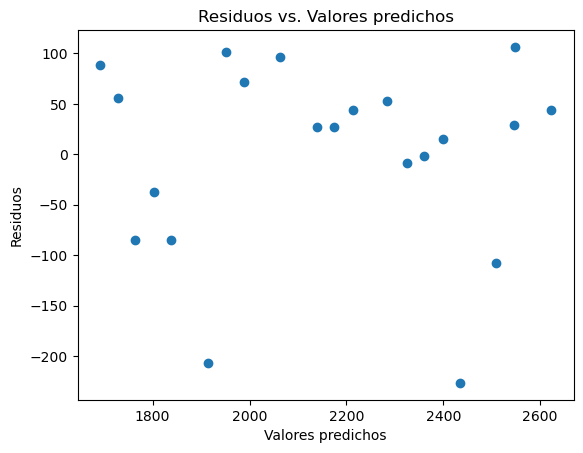

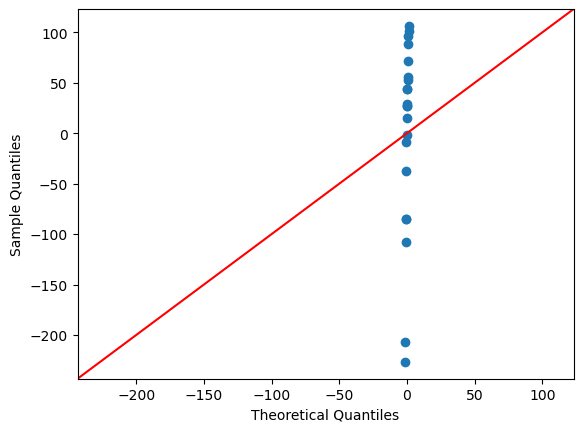

Durbin-Watson: 2.027098103298398


In [69]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Tus datos
yn = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
               1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
               2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
               2053.50, 2414.40, 2200.50, 2654.20, 1753.70, 2665.86])

xn = np.array([150.50, 230.75, 80.00, 170.00, 50.50, 190.00, 240.00, 20.50,
               70.50, 110.00, 130.00, 30.75, 250.00, 90.75, 220.00, 180.00,
               60.00, 120.50, 20.00, 210.50, 0.00])

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(xn)
model = sm.OLS(yn, X).fit()

# Resumen del modelo
print(model.summary())

# Gráfico de residuos vs. valores predichos
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores predichos')
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line ='45')
plt.show()

# Durbin-Watson
durbin_watson = sm.stats.stattools.durbin_watson(model.resid)
print('Durbin-Watson:', durbin_watson)